<h2 align="center" style="color:purple">Phase 2: AtliQo Bank Credit Card </h2>

### Business Analysis and launch of AB testing: Targeting Untapped Market

### Insights specific to customers with age group of 18 - 25
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

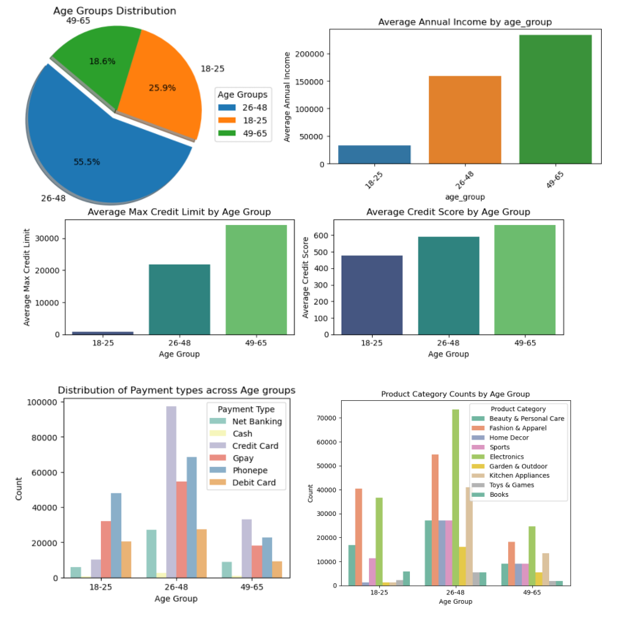

In [1]:
from IPython.display import Image, display

display(Image(filename='analysis.png'))

## (1) Pre-Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business. We will use 

In [2]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha,  
    power=power,  
    ratio=1, 
    alternative='two-sided'
)

393.4056930002526

In [4]:
effect_sizes= [0.1,0.2,0.3,0.4,0.5,1]

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(
    effect_size=effect_size, 
    alpha=alpha,  
    power=power,  
    ratio=1, 
    alternative='two-sided'
    )
    print(f"Effect Size: {effect_size}, Required Sample Size: {sample_size:.0f} customers")

Effect Size: 0.1, Required Sample Size: 1571 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 64 customers
Effect Size: 1, Required Sample Size: 17 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run


#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

 ##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

## (2) Post-Campaign

## Two Sample Z Test for Our Hypothesis Testing

In [5]:
df = pd.read_csv('datasets/avg_transactions_after_campaign.csv')
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29


In [6]:
df.shape

(62, 3)

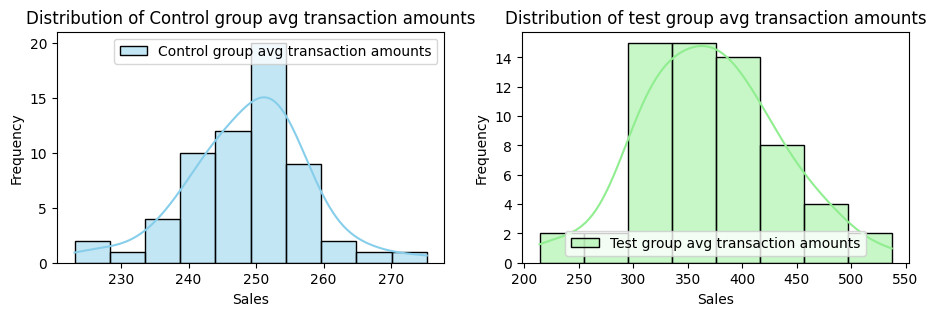

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

plt.show()

In [8]:
control_mean = df["control_group_avg_tran"].mean()
control_std = df["control_group_avg_tran"].std()

control_mean,control_std

(np.float64(248.94129032258064), np.float64(9.137869049553624))

In [9]:
test_mean = df["test_group_avg_tran"].mean()
test_std = df["test_group_avg_tran"].std()

test_mean, test_std

(np.float64(370.5364516129033), np.float64(63.25415113953286))

In [10]:
sample_size = df.shape[0]
sample_size

62

In [11]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

np.float64(14.98090307099052)

In [12]:
alpha = 0.05
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

np.float64(1.6448536269514722)

In [13]:
Z_score > critical_z_value

np.True_

Since Z score is higher than critical Z value, we can reject the null hypothesis.

In [14]:
p_value = 1 - st.norm.cdf(Z_score)
p_value

np.float64(0.0)

In [15]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

np.True_

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

In [16]:
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(np.float64(14.980903070990523), np.float64(4.893899020400689e-51))

In [17]:
test_group_CI = st.norm.interval(0.95, loc=test_mean, scale=test_std/np.sqrt(sample_size))
test_group_CI
                                 

(np.float64(354.79150188846626), np.float64(386.28140133734036))

#### On AVG people is using 354.79 to 386.281 in Btw spending

In [18]:
!python -m pip freeze > requirements.txt
